In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


Customers Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ----

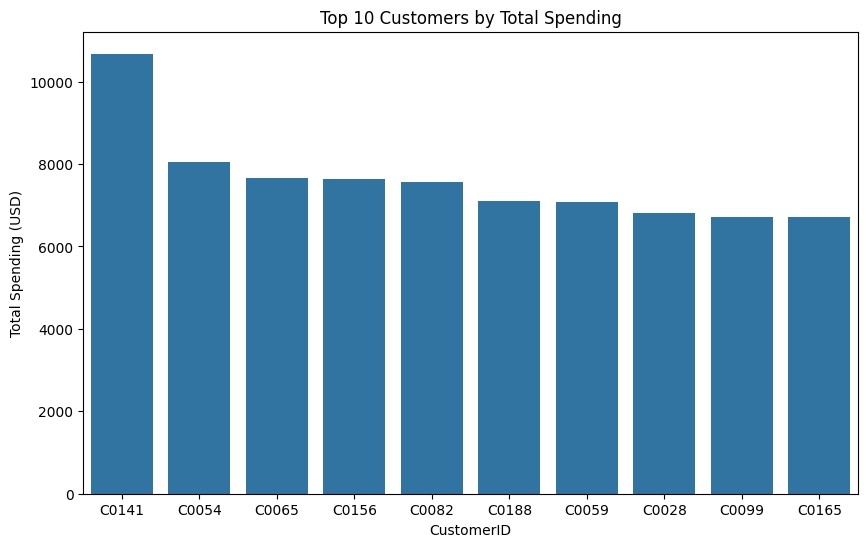

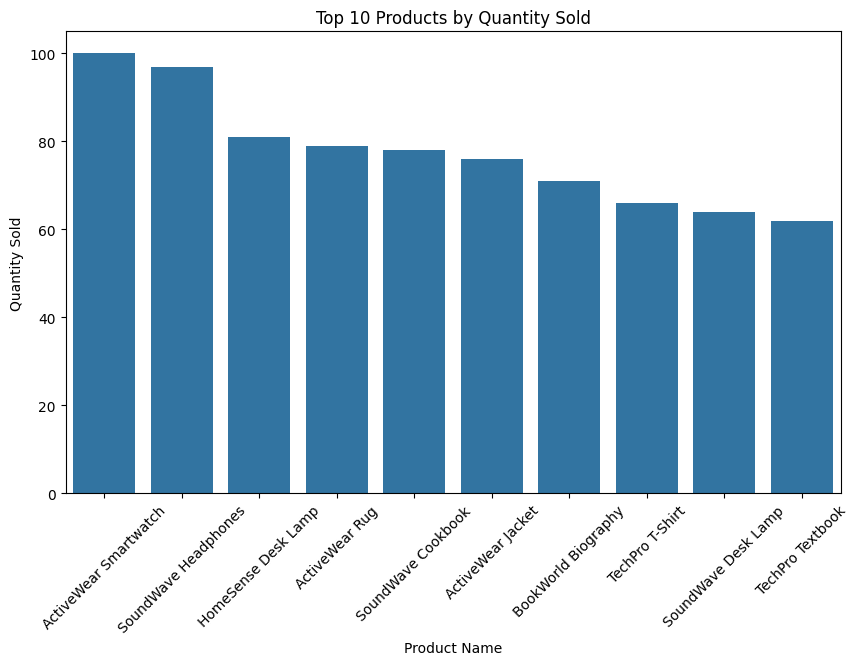

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print("Customers Dataset Overview:")
print(customers.info(), customers.head())
print("\nProducts Dataset Overview:")
print(products.info(), products.head())
print("\nTransactions Dataset Overview:")
print(transactions.info(), transactions.head())

print("\nMissing Values in Each Dataset:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=customer_spending.head(10).index, y=customer_spending.head(10).values)
plt.title("Top 10 Customers by Total Spending")
plt.ylabel("Total Spending (USD)")
plt.xlabel("CustomerID")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.head(10).index, y=product_sales.head(10).values)
plt.title("Top 10 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product Name")
plt.xticks(rotation=45)
plt.show()